In [1]:
!pip install yfinance

In [2]:
#pip install yahoo-finance

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime
import statsmodels.tsa.stattools as ts 
import statsmodels.api as sm

In [4]:
def check_date(date, assets):
    end_date = date + datetime.timedelta(days=1)
    instrument_str = " ".join(assets)
    price_data = yf.download(instrument_str, start=date, end=end_date,  interval = '1m', progress=False, show_errors=False)
    nan_stats = price_data['Adj Close'].isna().sum()
    return price_data, nan_stats.sum()

In [5]:
assets = ['BTC-USD', 'ETH-USD']

In [6]:
start_date = datetime.date(2022, 12, 1)
for i in range(31):
    date = start_date + datetime.timedelta(days=i)
    data, nans = check_date(date, assets)
    print(f'{date}: datapoints {len(data)}, missing values {nans:.0f}')

2022-12-01: datapoints 0, missing values 0
2022-12-02: datapoints 0, missing values 0
2022-12-03: datapoints 0, missing values 0
2022-12-04: datapoints 0, missing values 0
2022-12-05: datapoints 0, missing values 0
2022-12-06: datapoints 0, missing values 0
2022-12-07: datapoints 0, missing values 0
2022-12-08: datapoints 0, missing values 0
2022-12-09: datapoints 0, missing values 0
2022-12-10: datapoints 0, missing values 0
2022-12-11: datapoints 0, missing values 0
2022-12-12: datapoints 0, missing values 0
2022-12-13: datapoints 0, missing values 0
2022-12-14: datapoints 0, missing values 0
2022-12-15: datapoints 0, missing values 0
2022-12-16: datapoints 0, missing values 0
2022-12-17: datapoints 0, missing values 0
2022-12-18: datapoints 0, missing values 0
2022-12-19: datapoints 1420, missing values 39
2022-12-20: datapoints 1429, missing values 2
2022-12-21: datapoints 1432, missing values 0
2022-12-22: datapoints 1434, missing values 0
2022-12-23: datapoints 1429, missing valu

In [7]:
date = datetime.datetime(2022, 12, 28)
end_date = date + datetime.timedelta(days=1)
price_data = yf.download(" ".join(assets), start=date, end=end_date,  interval = '1m')
adjclose = price_data['Adj Close']
adjclose

[*********************100%***********************]  2 of 2 completed


,BTC-USD,ETH-USD
Datetime,,
2022-12-28 00:00:00,16716.400391,1212.736572
2022-12-28 00:01:00,16716.486328,1212.768066
2022-12-28 00:02:00,16715.480469,1212.663208
2022-12-28 00:03:00,16714.017578,1212.757812
2022-12-28 00:04:00,16716.972656,1212.963379
...,...,...
2022-12-28 23:54:00,16547.451172,1188.976685
2022-12-28 23:55:00,16548.355469,1189.352295
2022-12-28 23:56:00,16548.394531,1189.535767


In [8]:
nan_stats = price_data.isna().sum()
nan_stats

Adj Close  BTC-USD    0
           ETH-USD    0
Close      BTC-USD    0
           ETH-USD    0
High       BTC-USD    0
           ETH-USD    0
Low        BTC-USD    0
           ETH-USD    0
Open       BTC-USD    0
           ETH-USD    0
Volume     BTC-USD    0
           ETH-USD    0
dtype: int64

In [9]:
if nan_stats.sum() > 0:
    raise ValueError("Data contains NaN values")

In [10]:
adjclose.describe()

,BTC-USD,ETH-USD
count,1435.000000,1435.000000
mean,16645.596147,1197.211222
std,51.781987,6.071160
min,16497.556641,1185.702148
25%,16621.053711,1194.401611
50%,16655.882812,1196.110352
75%,16673.121094,1198.071533
max,16768.169922,1213.128906


In [11]:
price_data['Open'].iloc[0]

BTC-USD    16716.400391
ETH-USD     1212.736572
Name: 2022-12-28 00:00:00, dtype: float64

In [12]:
adjclose.iloc[-1]

BTC-USD    16550.255859
ETH-USD     1190.018066
Name: 2022-12-28 23:58:00, dtype: float64

In [13]:
lr1 = np.log(adjclose.iloc[:, 0] / adjclose.iloc[:, 0].shift(1))[1:] 
lr2 = np.log(adjclose.iloc[:, 1] / adjclose.iloc[:, 1].shift(1))[1:] 
rho = lr1.corr(lr2)
rho

0.8698139813517588

In [14]:
coint_results = ts.coint(np.log(adjclose.iloc[:, 0]), np.log(adjclose.iloc[:, 1]))
print(f't-stat: {coint_results[0]}\np-value: {coint_results[1]}\ncritical values [1%, 5%, 10%]: {coint_results[2]}')

t-stat: -1.298411541085446
p-value: 0.8302144374151877
critical values [1%, 5%, 10%]: [-3.90409361 -3.3403942  -3.04740892]


In [15]:
model = sm.OLS(np.log(adjclose.iloc[:, 0]), np.log(adjclose.iloc[:, 1]))
result = model.fit()
beta = result.params[0]
beta

1.3713675557481548

In [16]:
trading_time = 1440
M = len(adjclose)
S1_0 = price_data['Open'].iloc[:, 0][0] 
S2_0 = price_data['Open'].iloc[:, 1][0] 
mu1 = lr1.mean() * trading_time 
mu2 = lr2.mean() * trading_time 
sigma1 = lr1.std() * np.sqrt(trading_time) 
sigma2 = lr2.std() * np.sqrt(trading_time) 
print(f'{M=}, {S1_0=}, {S2_0=}, {mu1=}, {mu2=}, {sigma1=}, {sigma2=}')

M=1435, S1_0=16716.400390625, S2_0=1212.736572265625, mu1=-0.010030529224028436, mu2=-0.018990072384115333, sigma1=0.007783264099159454, sigma2=0.010117052492744758


In [18]:
z_0 = 0.00 
gamma = 0.5 
T = 1 
dt = T/M
delta = 1

In [19]:
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi1 = np.zeros((M + 1, 1))
Pi2 = np.zeros((M + 1, 1))

In [20]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma1 ** 2 + beta ** 2 * sigma2 ** 2 + 2 * beta * sigma1 * sigma2 * rho)
eta = (-1/delta) * (mu1 - sigma1 ** 2/2 + beta*(mu2 - sigma2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma1 + beta * sigma2 * rho)/ sigma_beta * rn1[t] + beta * (sigma2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = adjclose.iloc[:, 0][t-1]
    S2[t] = adjclose.iloc[:, 1][t-1]

In [21]:
colors = ['b', 'g']
font = {'family': 'sans-serif',
        'color':  'b',
        'weight': 'bold',
        'size': 14,
        }

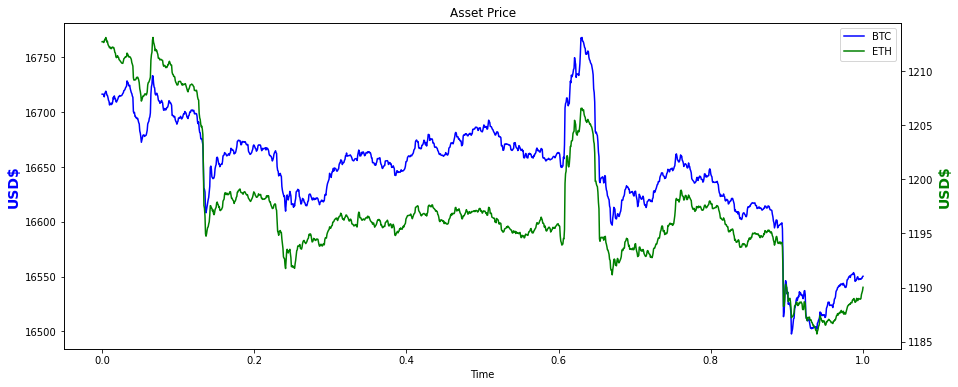

In [22]:
labels = [c.replace('-USD','').replace('.SW','') for c in adjclose.columns]
fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()

lns1 = ax1.plot(tt, S1, colors[0], lw=1.5, label=labels[0])
lns2 = ax2.plot(tt, S2, colors[1], lw=1.5, label=labels[1])
ax1.set_xlabel('Time')
ax1.set_ylabel('USD$',fontdict=font, color=colors[0])
ax2.set_ylabel('USD$',fontdict=font, color=colors[1])

leg = lns1 + lns2
labels = [l.get_label() for l in leg]
ax1.legend(leg, labels, loc=0)

plt.title('Asset Price')
plt.show()

Text(0.5, 1.0, 'z')

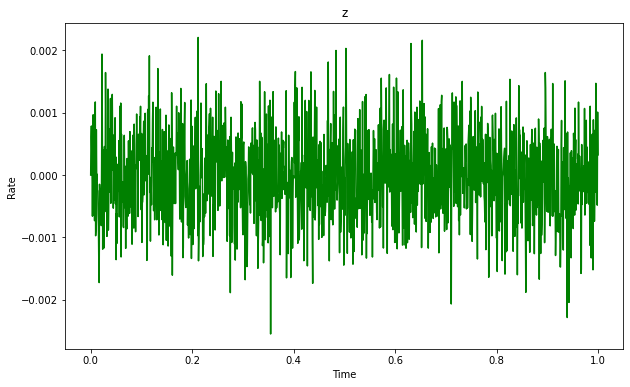

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [24]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma1 ** 2 + beta * sigma2 ** 2)/((1 - rho ** 2) * sigma1 ** 2) - rho * mu2 * (T - t * dt)/((1 - rho **2) * sigma1 * sigma2)
    c[t] = 0.5 * mu2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma1 ** 2 + beta * sigma2 ** 2 + 2 * sigma1 * sigma2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu2 * delta * rho * (sigma1 ** 2 + beta * sigma2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma1 ** 2 + beta * sigma2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma1 ** 2)
    Pi1[t] = (1 / S1[t]) * ((mu1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma1 ** 2) + delta/gamma * (-2 * a[t] * (mu1 + delta * z[t])-b[t]) - rho * mu2/(gamma * (1 - rho ** 2) * sigma1 * sigma2))
    Pi2[t] = (1 / S2[t]) * (mu2 / (gamma * (1 - rho ** 2) * sigma2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu1 + delta * z[t]) - b[t]) - rho * (mu1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma1 * sigma2))

Text(0.5, 1.0, 'Weights')

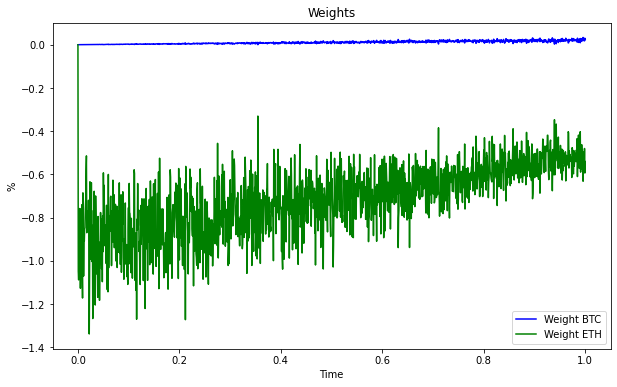

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi1, colors[0], lw=1.5, label=f'Weight {labels[0]}')
plt.plot(tt, Pi2, colors[1], lw=1.5, label=f'Weight {labels[1]}')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash process')

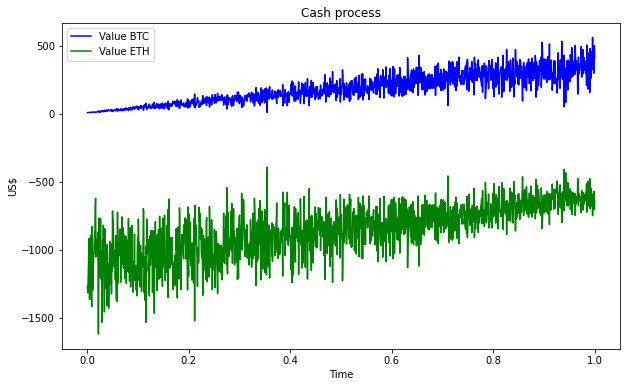

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Pi1[1:]*S1[1:], colors[0], lw=1.5, label=f'Value {labels[0]}')
plt.plot(tt[1:], Pi2[1:]*S2[1:], colors[1], lw=1.5, label=f'Value {labels[1]}')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('US$')
plt.title('Cash process')

Text(0.5, 1.0, 'Wealth')

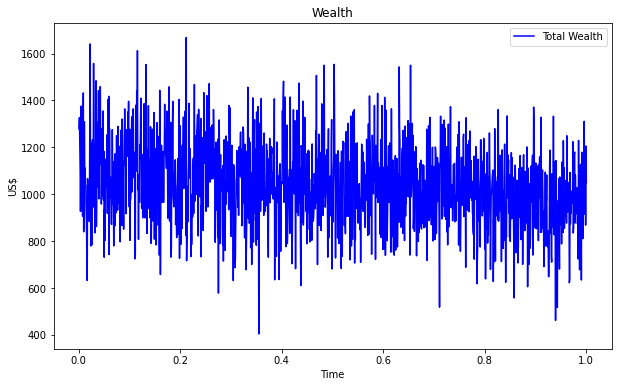

In [27]:
wealth_dynamic = np.abs(Pi1)*S1+np.abs(Pi2)*S2
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], wealth_dynamic[1:], 'b', lw=1.5, label='Total Wealth')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('US$')
plt.title('Wealth')

Text(0.5, 1.0, 'Comparison')

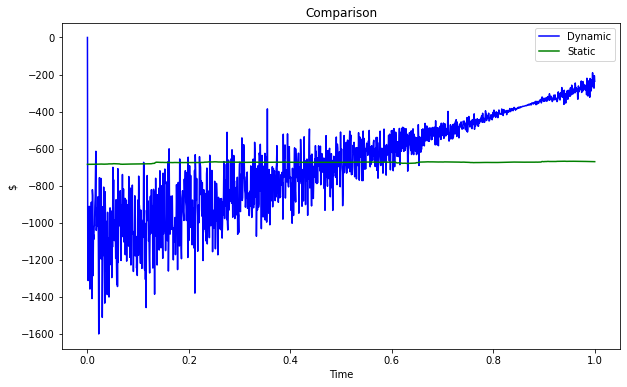

In [31]:
wealth_static = np.mean(Pi1)*S1+np.mean(Pi2)*S2
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi1 * S1 + Pi2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi1.mean() * S1 + Pi2.mean() * S2, 'g', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [29]:
dyn_return = 100*(wealth_dynamic[-1]/wealth_dynamic[1] - 1)
f'{float(dyn_return):.2f}%'

'-17.87%'

In [32]:
stat_return = 100*(wealth_static[-1]/wealth_static[1] -1)
f'{float(stat_return):.2f}%'

'-2.11%'

In [33]:
lr1 = np.log(adjclose.iloc[:, 0] / adjclose.iloc[:, 0].shift(1))[1:] # ignore NaN at the start due to shift
lr2 = np.log(adjclose.iloc[:, 1] / adjclose.iloc[:, 1].shift(1))[1:] # ignore NaN at the start due to shift
rho = lr1.corr(lr2)
rho

0.8698139813517588

In [34]:
beta, z_inter, *_ = linregress(np.log(adjclose.iloc[:, 0]), np.log(adjclose.iloc[:, 1]))
beta

1.36010493522342

In [ ]:
M = 1440                   
T = 1                      
dt = T/M                   
S1_0 = 16842               
S2_0 = 1218.9              
mu1 = 0.004629             
mu2 = 0.006507             
sigma1 = 0.003821          
sigma2 = 0.004519          
beta = 0.1354              
rho = 0.4774               
delta = 1                  
gamma = 0.6   

In [35]:
sS1 = np.zeros((M + 1, 1))
sS2 = np.zeros((M + 1, 1))
sz =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
sPi1 = np.zeros((M + 1, 1))
sPi2 = np.zeros((M + 1, 1))

In [36]:
tt = np.linspace(0, 1, M + 1)
sz[0] = z_0
sS1[0] = S1_0
sS2[0] = S2_0
sigma_beta = np.sqrt(sigma1 ** 2 + beta ** 2 * sigma2 ** 2 + 2 * beta * sigma1 * sigma2 * rho)
eta = (-1/delta) * (mu1 - sigma1 ** 2/2 + beta*(mu2 - sigma2 ** 2/2))
rn = np.random.standard_normal(sz.shape)
rn1 = np.random.standard_normal(sS1.shape) 
rn2 = np.random.standard_normal(sS2.shape) 
for t in range(1, M + 1):
    sz[t] = z[t-1]* (1 - delta * (eta - sz[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma1 + beta * sigma2 * rho)/ sigma_beta * rn1[t] + beta * (sigma2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    sS1[t] = sS1[t-1] * np.exp((mu1 + delta * sz[t] - sigma1 ** 2 / 2) * dt + sigma1 * np.sqrt(dt) * rn1[t])
    sS2[t] = sS2[t-1] * np.exp((mu2 - sigma2 ** 2 / 2) * dt + sigma2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))


In [37]:
colors = ['b', 'g']
font = {'family': 'sans-serif',
        'color':  'b',
        'weight': 'bold',
        'size': 14,
        }

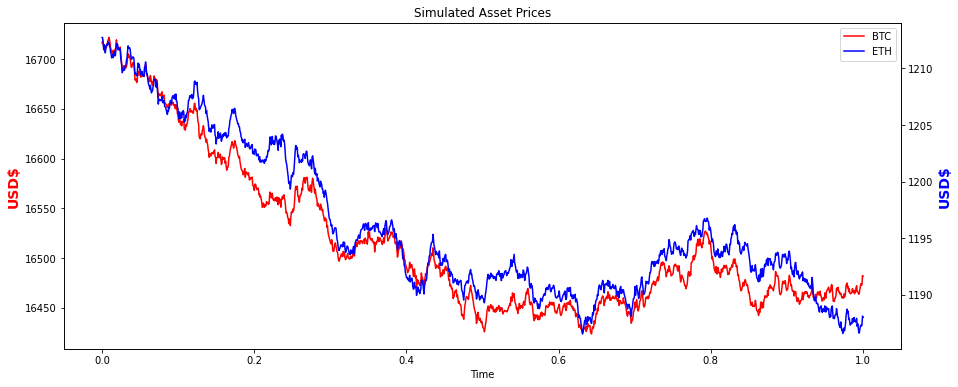

In [38]:
labels = [c.replace('-USD','') for c in adjclose.columns]
fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()

lns1 = ax1.plot(tt, sS1, 'r', lw=1.5, label=labels[0])
lns2 = ax2.plot(tt, sS2, 'b', lw=1.5, label=labels[1])
ax1.set_xlabel('Time')
ax1.set_ylabel('USD$',fontdict=font, color='r')
ax2.set_ylabel('USD$',fontdict=font, color='b')

leg = lns1 + lns2
labels = [l.get_label() for l in leg]
ax1.legend(leg, labels, loc=0)

plt.title('Simulated Asset Prices')
plt.show()

Text(0.5, 1.0, 'Simulated z')

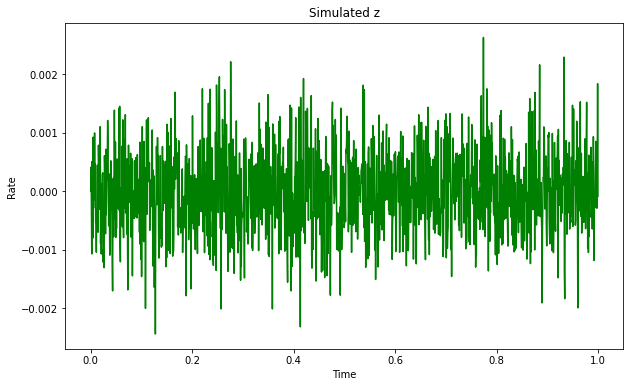

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(tt, sz, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Simulated z')

In [40]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma1 ** 2 + beta * sigma2 ** 2)/((1 - rho ** 2) * sigma1 ** 2) - rho * mu2 * (T - t * dt)/((1 - rho **2) * sigma1 * sigma2)
    c[t] = 0.5 * mu2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma1 ** 2 + beta * sigma2 ** 2 + 2 * sigma1 * sigma2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu2 * delta * rho * (sigma1 ** 2 + beta * sigma2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma1 ** 2 + beta * sigma2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma1 ** 2)
    sPi1[t] = (1 / sS1[t]) * ((mu1 + delta * sz[t])/(gamma * (1 - rho ** 2) * sigma1 ** 2) + delta/gamma * (-2 * a[t] * (mu1 + delta * sz[t])-b[t]) - rho * mu2/(gamma * (1 - rho ** 2) * sigma1 * sigma2))
    sPi2[t] = (1 / sS2[t]) * (mu2 / (gamma * (1 - rho ** 2) * sigma2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu1 + delta * sz[t]) - b[t]) - rho * (mu1 + delta * sz[t]) / (gamma * (1 - rho ** 2) * sigma1 * sigma2))


Text(0.5, 1.0, 'Simluated Weights')

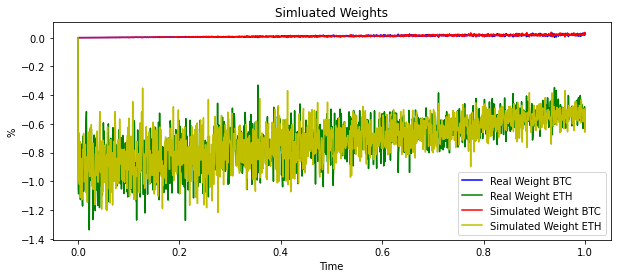

In [41]:
t_space = np.linspace(0, 1, len(Pi1))
plt.figure(figsize=(10, 4))
plt.plot(t_space, Pi1, colors[0], lw=1.5, label=f'Real Weight {labels[0]}')
plt.plot(t_space, Pi2, colors[1], lw=1.5, label=f'Real Weight {labels[1]}')
plt.plot(tt, sPi1, 'r', lw=1.5, label=f'Simulated Weight {labels[0]}')
plt.plot(tt, sPi2, 'y', lw=1.5, label=f'Simulated Weight {labels[1]}')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Simluated Weights')

Text(0.5, 1.0, 'Simluated Cash')

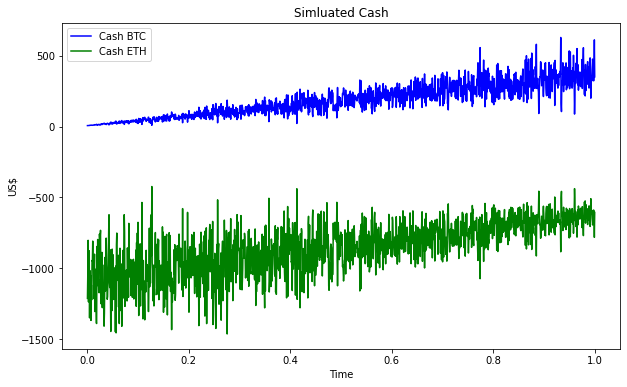

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], sPi1[1:]*sS1[1:], 'b', lw=1.5, label=f'Cash {labels[0]}')
plt.plot(tt[1:], sPi2[1:]*sS2[1:], 'g', lw=1.5, label=f'Cash {labels[1]}')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('US$')
plt.title('Simluated Cash')

Text(0.5, 1.0, 'Simulated Wealth')

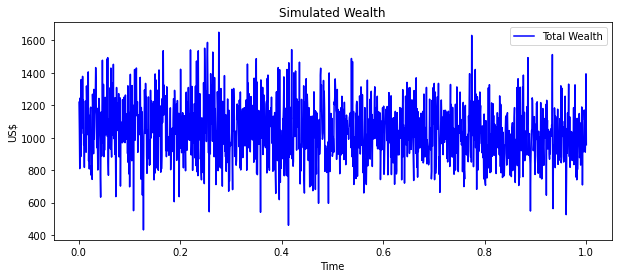

In [43]:
s_wealth_dynamic = np.abs(sPi1)*sS1+np.abs(sPi2)*sS2
plt.figure(figsize=(10, 4))
plt.plot(tt[1:], s_wealth_dynamic[1:], 'b', lw=1.5, label='Total Wealth')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('US$')
plt.title('Simulated Wealth')

Text(0.5, 1.0, 'Comparison')

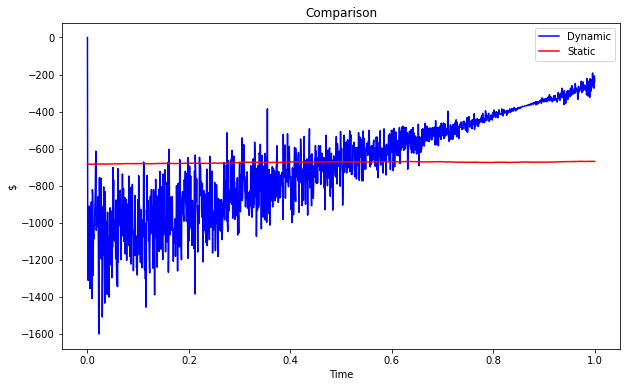

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi1 * sS1 + Pi2 * sS2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi1.mean() * sS1 + Pi2.mean() * sS2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')